In [3]:
!pip install opencv-python

In [7]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

In [9]:
train = ImageDataGenerator(rescale= 1/255)
validation = ImageDataGenerator(rescale= 1/255)

In [10]:
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Input(shape=(200, 200, 3)),  # 👈 Preferred way
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

In [11]:
# Create an ImageDataGenerator object (if not already)
train = ImageDataGenerator(rescale=1./255)

train_dataset = train.flow_from_directory(
    r'C:\Users\OM\Desktop\vision\basedata\Train',
    target_size=(200, 200),
    batch_size=3,
    class_mode='binary'
)

validation_dataset = train.flow_from_directory(
    r'C:\Users\OM\Desktop\vision\basedata\Validation',
    target_size=(200, 200),
    batch_size=3,
    class_mode='binary'
)

Found 41 images belonging to 2 classes.
Found 41 images belonging to 2 classes.


In [13]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # for binary classification
    metrics=['accuracy']
)

In [14]:
train_dataset.class_indices

{'Happy': 0, 'Unhappy': 1}

In [15]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
from tensorflow.keras.optimizers import RMSprop

model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(learning_rate=0.001),  # ✅ use learning_rate, not lr
    metrics=['accuracy']
)

In [18]:
model_fit = model.fit(
    train_dataset,
    epochs=10  # remove steps_per_epoch for automatic handling
)

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 174ms/step - accuracy: 1.0000 - loss: 0.0014
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - accuracy: 1.0000 - loss: 6.5698e-04
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 188ms/step - accuracy: 1.0000 - loss: 3.9243e-04
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 181ms/step - accuracy: 1.0000 - loss: 1.5040e-04
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 186ms/step - accuracy: 1.0000 - loss: 1.6981e-04
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 191ms/step - accuracy: 1.0000 - loss: 1.7636e-04
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 182ms/step - accuracy: 1.0000 - loss: 5.7593e-05
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 191ms/step - accuracy: 1.0000 - loss: 3.7492e-05
Epoch 9/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 185ms/step - accuracy: 1.0000 - loss: 1.1900e-05
Epoch 10/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 178ms/step - accuracy: 1.0000 - loss: 1.1327e-05


T1.jpg: You are Happy


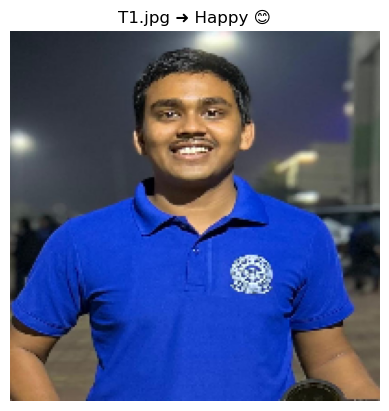

T2.jpg: You are Not Happy


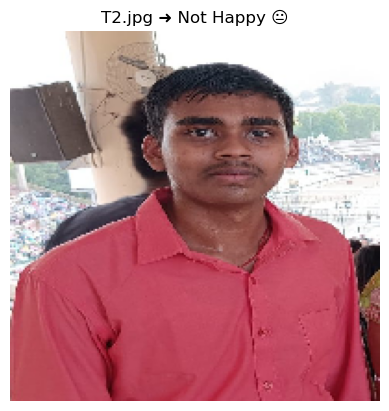

T3.jpg: You are Happy


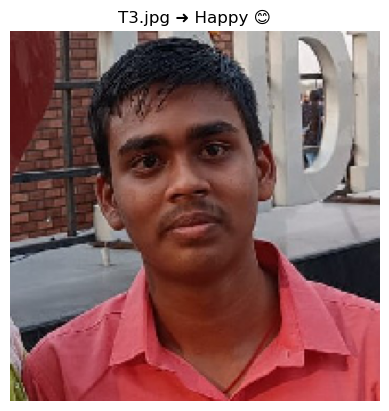

T4.jpg: You are Happy


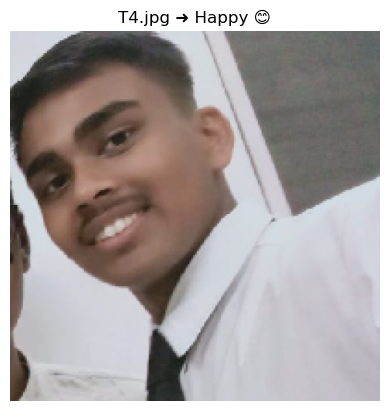

T5.jpg: You are Not Happy


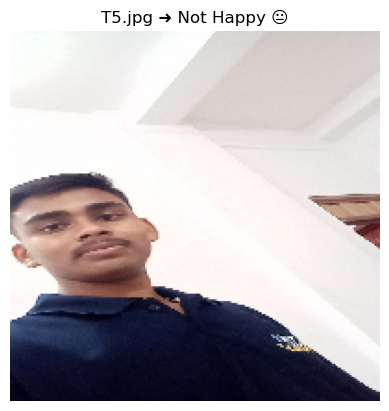

T6.jpg: You are Happy


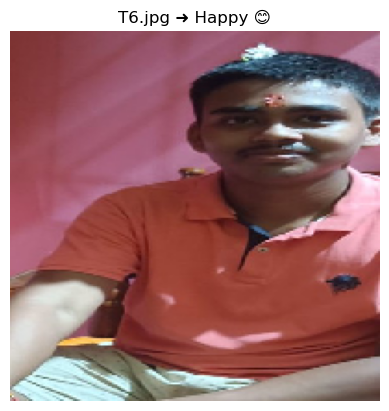

T7.jpg: You are Happy


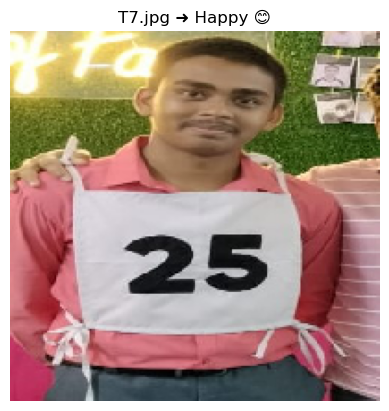

T8.jpg: You are Happy


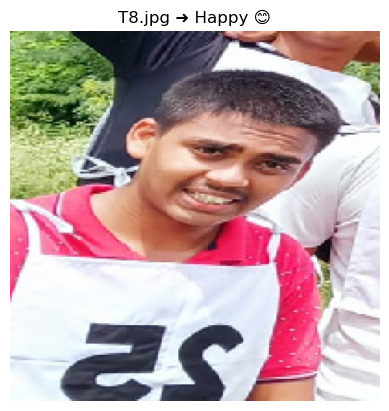

In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

dir_path = 'C:/Users/OM/Desktop/vision/basedata/Test'

for i in os.listdir(dir_path):
    img_path = os.path.join(dir_path, i)
    
    # Load and preprocess image
    img = image.load_img(img_path, target_size=(200, 200))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # normalize (important if trained with rescale=1./255)

    # Predict
    prediction = model.predict(img_array, verbose=0)
    
    # Show image
    plt.imshow(img)
    plt.axis('off')
    if prediction < 0.5:
        plt.title(f"{i} ➜ Happy 😊")
        print(f"{i}: You are Happy")
    else:
        plt.title(f"{i} ➜ Not Happy 😐")
        print(f"{i}: You are Not Happy")
    plt.show()
